The goal of this notebook is to
- Obtain the most common n-grams 
- Create word clouds
- and, (more generally) generate statistics 

In [1]:
import json
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer

# Load your JSON data
path = "cards.json"
with open(path, "r", encoding="utf8") as f:
    data = json.load(f)

# Organize cards by color
colorDict = {
    'W': [], 'U': [], 'B': [], 'R': [], 'G': [], 'colorless': []
}

for card in data:
    # Skip cards based on set type
    if card['set_type'] in ['funny', 'memorabilia']:
        continue

    # Process oracle text
    if 'oracle_text' in card:
        text = re.sub("\n", " ", card['oracle_text'])
        text = re.sub(re.escape(card['name']), "CARDNAME", text)
        card['oracle_text'] = text
        # Categorize by color
        colors = card['color_identity']
        if not colors:
            colorDict['colorless'].append(card)
        else:
            for color in colors:
                colorDict[color].append(card)


Most common bigrams  W
[(('enters', 'battlefield'), 1382), (('end', 'turn'), 1189), (('creature', 'control'), 1170), (('target', 'creature'), 1140), (('cardname', 'enters'), 1077), (('creature', 'token'), 691), (('gain', 'life'), 590), (('get', 'end'), 548), (('creature', 'get'), 450), (('draw', 'card'), 411)]
Most common bigrams  U
[(('enters', 'battlefield'), 1292), (('cardname', 'enters'), 1033), (('target', 'creature'), 1031), (('draw', 'card'), 1028), (('end', 'turn'), 784), (('creature', 'control'), 573), (('owner', 'hand'), 548), (('cast', 'spell'), 528), (('card', 'library'), 444), (('target', 'spell'), 441)]
Most common bigrams  B
[(('target', 'creature'), 1305), (('enters', 'battlefield'), 1216), (('end', 'turn'), 1082), (('cardname', 'enters'), 996), (('card', 'graveyard'), 881), (('creature', 'card'), 681), (('get', 'end'), 653), (('creature', 'get'), 552), (('discard', 'card'), 545), (('creature', 'control'), 533)]
Most common bigrams  R
[(('deal', 'damage'), 1738), (('car

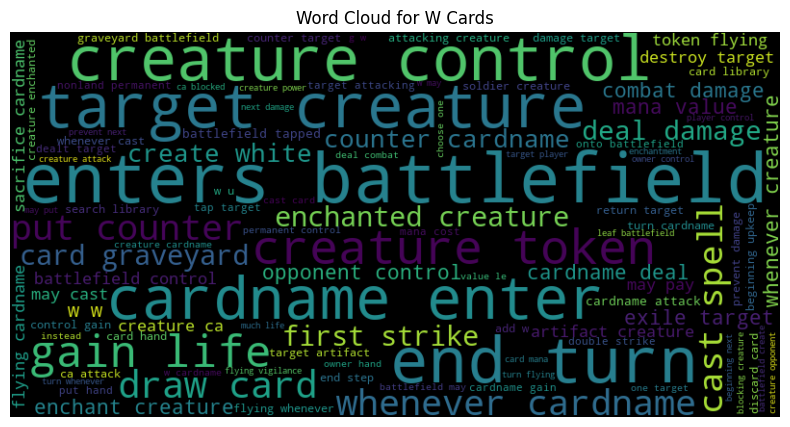

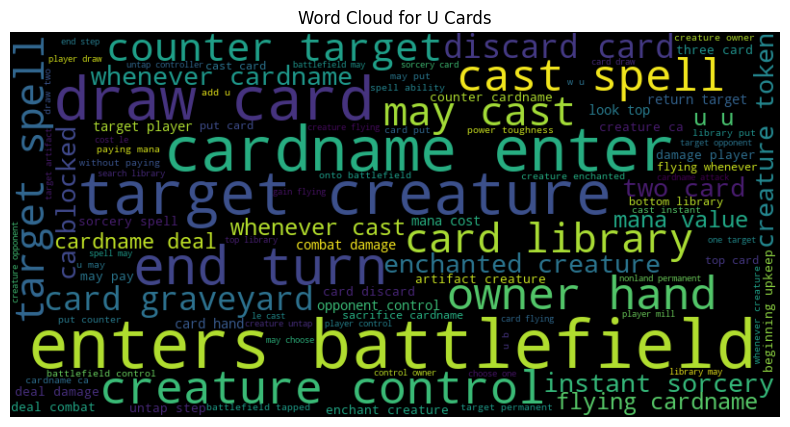

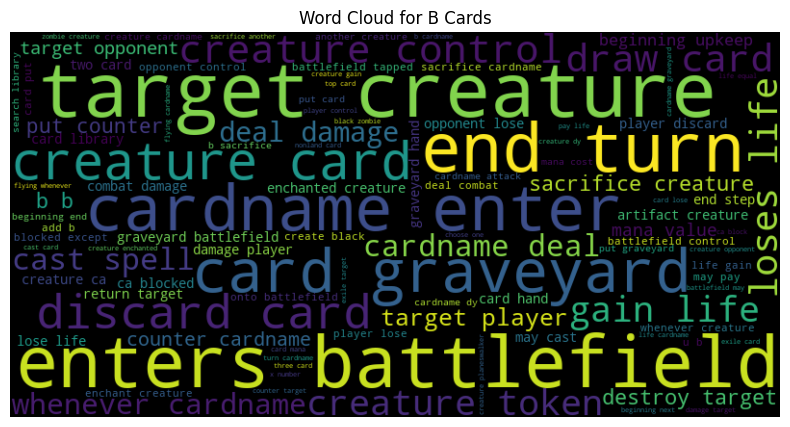

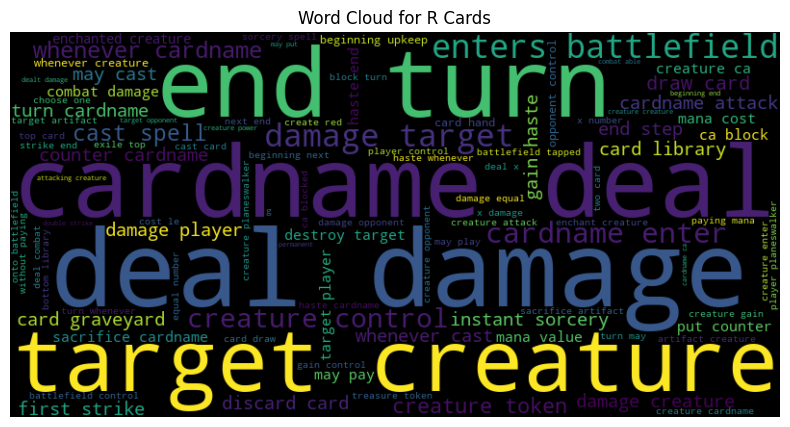

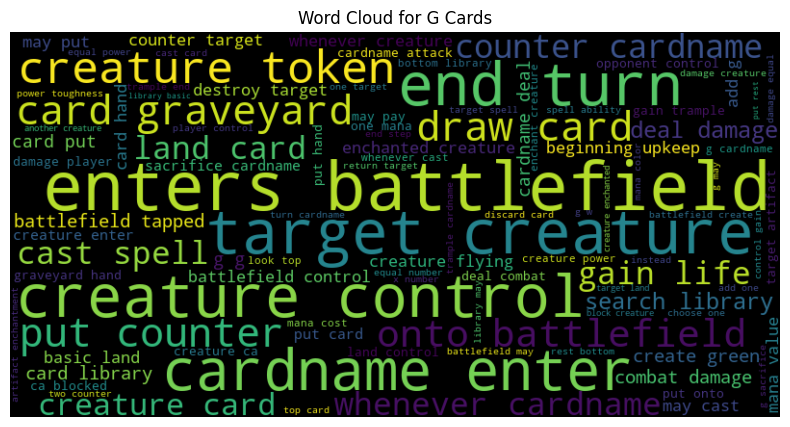

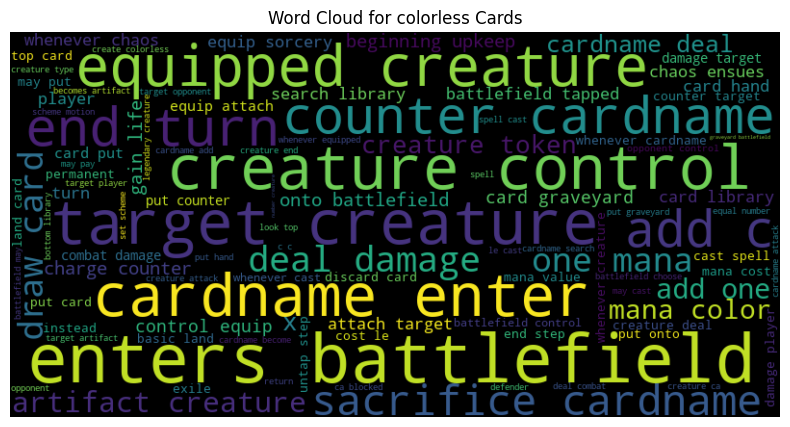

In [12]:
#Process and tokenize text
def processText(text):
    # Tokenize, remove stopwords and lemmatize
    stopWords = set(nltk.corpus.stopwords.words('english'))
    additionalStopwords = {"{", "}", "[", "]", ":", "-", "_", "/", "\\", "*", "&", "^", "%", "$", "`", "`", "also", "what", "these", "just", "even", "rather", "somewhat", "however", "i.e.", "al", "where", "then", "hence", "none", "et", "so", "when", "how", "since", "either", "etc", "such", "quite", "fig", "neither", "therefore", "which", "vs", "why", "both", "e.g.", "thus", "who", "those", "due", "whom"}
    stopWords.update(additionalStopwords)
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stopWords]
    return tokens

#Process each color category
for color, cards in colorDict.items():
    combinedText = " ".join(card['oracle_text'] for card in cards if 'oracle_text' in card)
    tokens = processText(combinedText)

    #Generate n-grams (bigrams in this case)
    bigrams = nltk.ngrams(tokens, 2)
    freqDist = FreqDist(bigrams)
    print("Most common bigrams ", color)
    print(freqDist.most_common(10))

    #Generate and save word cloud for each color
    wordCloud = WordCloud(width=800, height=400, max_words=100).generate(" ".join(tokens))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {color} Cards")
    plt.savefig(f"wordcloud_{color}.png")

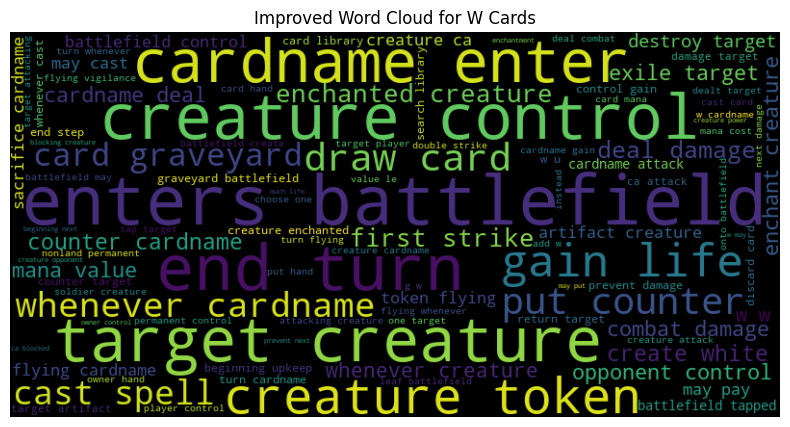

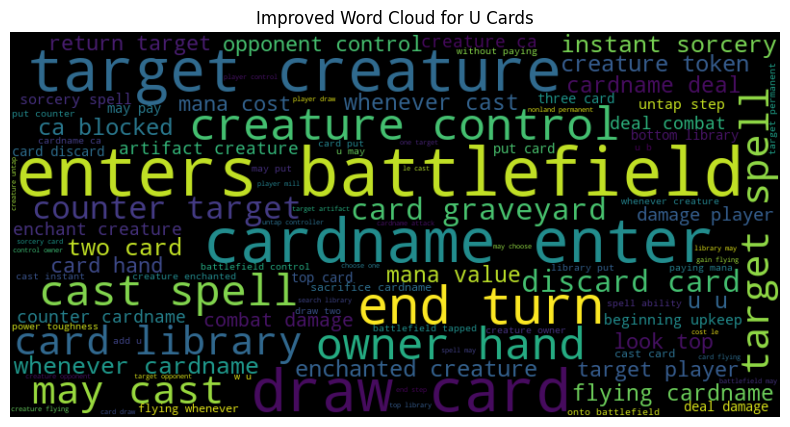

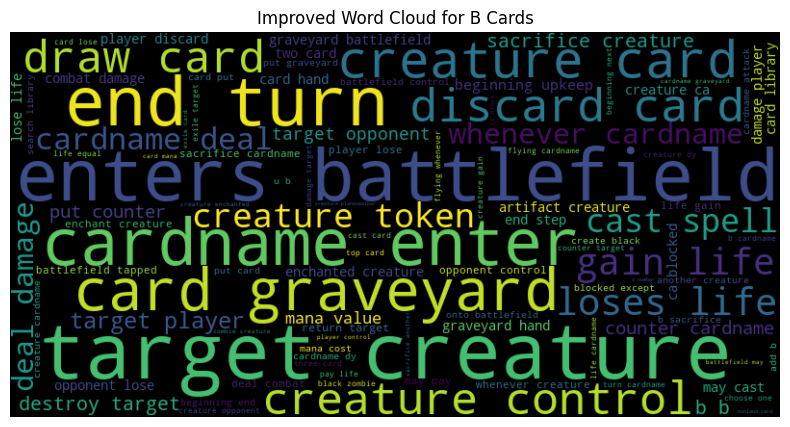

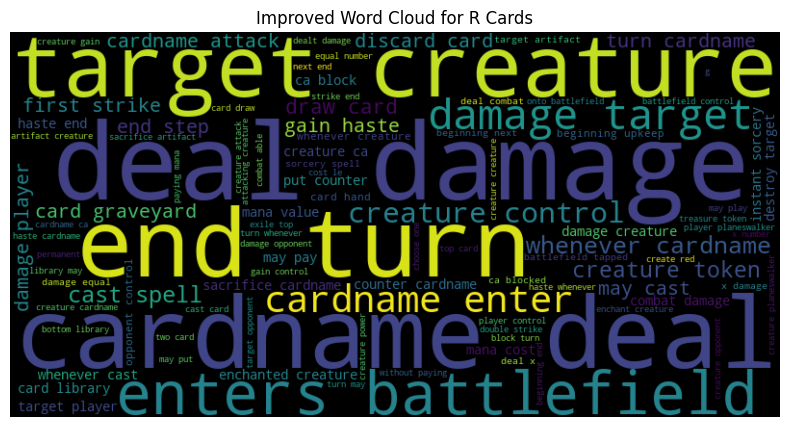

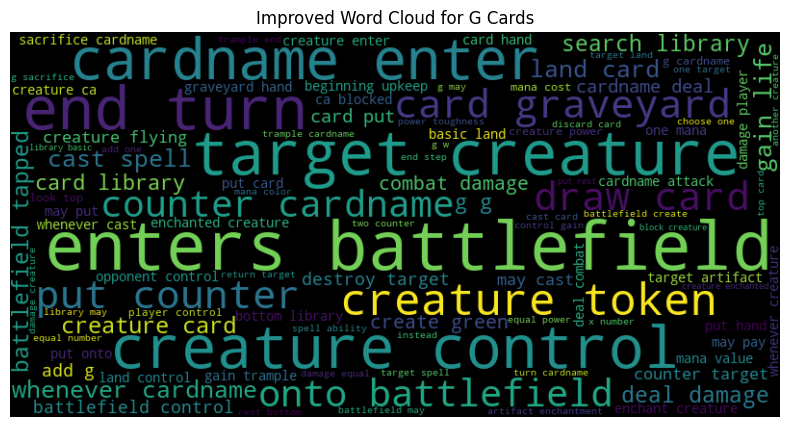

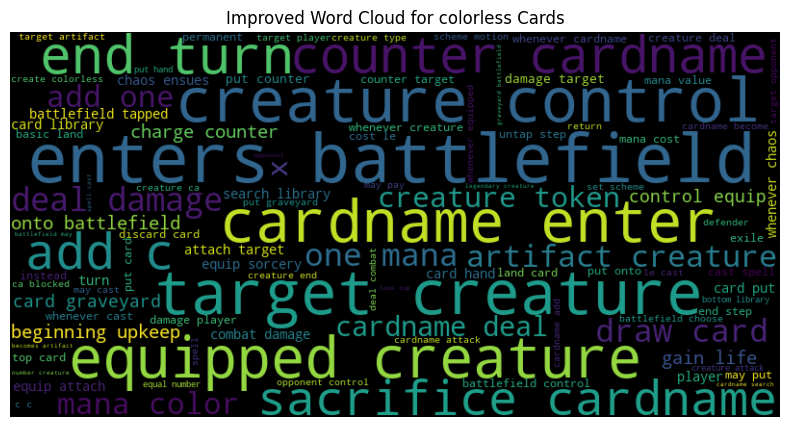

In [13]:
#Process text and remove improved stopwords
def processTextImproved(text):
    #Add to this cause I do not know anything about Magic and I do not want to remove important words
    improvedStoplist = set(nltk.corpus.stopwords.words('english'))
    #Improve stopwords here
    additionalStopwords = {}
    improvedStoplist.update(additionalStopwords)
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower() not in improvedStoplist]
    return tokens

#Process each color category with improved stoplist
for color, cards in colorDict.items():
    combinedText = " ".join(card['oracle_text'] for card in cards if 'oracle_text' in card)
    tokens_improved = processTextImproved(combinedText)

    #Generate and save word cloud with improved stoplist
    wordCloudImproved = WordCloud(width=800, height=400, max_words=100).generate(" ".join(tokens_improved))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordCloudImproved, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Improved Word Cloud for {color} Cards")
    plt.savefig(f"wordcloud_{color}_improved.png")